<a href="https://colab.research.google.com/github/Vrushti07/Synapse/blob/week7/Copy_of_SynapseNLPWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Task 2**

## **DJS Synapse Learning Period**
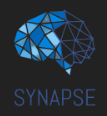

Yay, you made it to Week 2 of NLP! Last time we dealt with various ways to represent text numerically, this week we will dive into various deep learning algorithms specifically suited for NLP related applications.

An article covering multiple deep learning approaches utilised in NLP - https://medium.com/dair-ai/deep-learning-for-nlp-an-overview-of-recent-trends-d0d8f40a776d

#Create your own Embedding Layer

https://keras.io/api/layers/core_layers/embedding/

Look into what is the diiference between the embeddings we built in the previous task and the ones being built through this layer.

In [1]:
import pandas as pd
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:

# Load the IMDB dataset again
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [4]:
#Lemmatizing 50,000 reviews takes a lot of time, so if you are a busybee, run on only 5000 columns
df = df[:5000]

In [5]:
import re
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize

lem = WordNetLemmatizer()

In [8]:
# Dust off the function you used last time to pre-process your data. Remember, the corpus should be a list of list of words
def text_transform(df):
  corpus = []
  #code here
  stop = stopwords.words('english')
  for i in range(len(df)):
    t_corp = re.sub('[^\s+A-Za-z0-9]', ' ', df[i]).lower()
    t_corp = word_tokenize(t_corp)
    t_corp = [lem.lemmatize(i) for i in t_corp if i not in stop]
    corpus.append(t_corp)
  return corpus
corpus = text_transform(df['review'])
corpus

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

If you read up on Keras' Embedding layer, you know that it converts an indiced representation of your vocabulary into dense embedded vectors which you can feed into subsequent layers. We will use One-Hot representation to create this index. The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

In [ ]:
#Find vocabulary count of your corpus
#code
vocabulary = len(set([i for j in corpus for i in j]))
vocabulary

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [ ]:
#Look into what format the one_hot library requires and accordingly fill data in OH_rep
OH_rep = []
#code
for i in df['review']:
  OH_rep.append(one_hot(i,vocabulary))

#OH_rep contains the vectorized numeric values

In [ ]:
len(OH_rep)

In [ ]:

# Padding: 2 types: pre padding, post padding - try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
pre_pad = pad_sequences(OH_rep, maxlen = 500, padding = "pre", truncating = "post")#code
post_pad = pad_sequences(OH_rep, maxlen = 500, padding = "post", truncating = "post")
print(pre_pad[0])
print("\n",post_pad[0])

In case you're still confused by Keras' Sequential Model - https://youtu.be/VGCHcgmZu24?si=ntdywfeqCcAjWWqZ

Lets make a custom Embedding Layer now.

In [ ]:
class CustomEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super(CustomEmbeddingLayer, self).__init__()
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        # Initialize the embedding matrix with random values
        self.embedding_matrix = self.add_weight(name = "embedding_matrix",
                                               shape=(self.vocab_size, self.embed_dim),
                                               initializer="random_normal",
                                               trainable=True)

    def call(self, inputs):
        # Map integer indices to embedding vectors
        inputs = tf.cast(inputs, dtype = tf.int32) #to resolve the type error (float32)
        return tf.nn.embedding_lookup(self.embedding_matrix, inputs) #Look into this (hint: you can use Tensorflow for this)


In [ ]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
dim= 10

In [ ]:
# Create a sequential model with the custom embedding layer along with the appropriate vocabulary size and the decided dimension size.
# Remember to add a Flatten layer to convert the input from 3D to 2D, and a final Dense layer.
#Your code here
model = Sequential()
model.add(CustomEmbeddingLayer(vocabulary, dim))
model.add(Flatten())
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#Compile the model with optimizer adam and loss mse
# Code here
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['accuracy'])

model.summary()

In [ ]:
import pandas as pd
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values
y

In [ ]:
#Split the dataset into train,test dataset
#Code here
X = pre_pad
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [ ]:
model.fit(X_train,y_train, epochs=10, verbose=2)

In [ ]:
model.evaluate(X_test,y_test,verbose=2)

Now that you tried out your own embedding layer, use Keras' inbuilt Embedding layer and run your model again. Are the accuracies comparable?

In [ ]:
new_model = Sequential()
new_model.add(Embedding(vocabulary, dim, input_length = 500))
new_model.add(Flatten())
new_model.add(Dense(units = 1, activation = 'sigmoid'))

new_model.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['accuracy'])

new_model.fit(X_train,y_train, epochs=10, verbose=2)
new_model.evaluate(X_test, y_test, verbose = True)

Nearly equal accuracies, but the inbuilt layer is producing higher accuracy.

#Text Generation using LSTM

LSTM Networks are used for a wide variety of purposes ranging from sentiment analysis to time series analysis, but one of its most interesting applications is text generation, which has tremendous application. All Large Language Models like GPT essentially perform is text generation, where they complete your prompt with a response deemed most appropriate to complete the prompt.

But let's back up a bit. If you didn't know, what is an LSTM Network?
Rewatch these videos -
https://youtu.be/WCUNPb-5EYI?si=4URnZuUdGkMwNmTY

https://youtu.be/YCzL96nL7j0?si=iHYqMXEV9VF1q9x2



Hopefully you can now appreciate how an LSTM is well suited to handle the challenge of text generation. Actually, wait, explain to me how LSTM's are suited to handle this task and capture context.

Ans:<br>
*   LSTMs have the ability of retaining context of words which it had encountered previously, unlike RNNs, through memory cells that they possess. Thus, with the context already kept in mind, it can generate text with a greater accuracy.
*   As they have three gates -> Forget Gate (for deciding whether a particular word which has been passed to it as an input is really significant and thus deciding to retain or discard it), Input Gate (for updating the text it has with the new input), and Output Gate (for sending the updated text to other LSTM layer), it is ensured that only those words that hold relevance and add on to the meaning of the text are retained.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

Now a question arises, what are we exactly generating? It would be foolish to assume the model just spits out a fully formed block of text. We can predict either the next character of next word in a sequence, and keep doing so until we have a block of text.

Which method is better, you ask?

https://medium.com/@john.l.tauscher/word-vs-character-text-generation-80a6dbba123a#:~:text=So%2C%20for%20a%20character%20generative,below%2C%20I%20had%2012%2C700%20inputs.

For this task, we will proceed with word generation.

We need a dataset for the model to learn how to generate text, and for that we're going to pick up the very wonderful book Alice In Wonderland by Lewis Caroll. Thanks, Lewis.

https://drive.google.com/file/d/1QOcIEov-jZqiJ6K7oDnaWup81Q7l_Ji3/view?usp=drive_link

In [ ]:
# Load your text data
file_path = '/content/gdrive/My Drive/SynapseLP/aliceinwonderland.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

text

In [ ]:
# Tokenize the text. Use Tokenizer provided by Keras and fit the text
import re
tokenizer = tf.keras.preprocessing.text.Tokenizer()
#code here
sent = []
for i in text.split('.'):
    i = re.sub('[^\s+A-Za-z0-9.]', ' ', i).lower().split('\n')
    for j in i:
        sent.append(j)

tokenizer.fit_on_texts(sent)
vocabulary =  len(tokenizer.word_index) + 1
vocabulary #no of words in tokenizer + 1

Now, instead of just passing complete sentences into our model, we will pass n-grams of increasing length which predicts the next word. As a result, the last n-gram of a sentence consists mostly of words which have been predicted by earlier n-grams. This image should make it clearer -

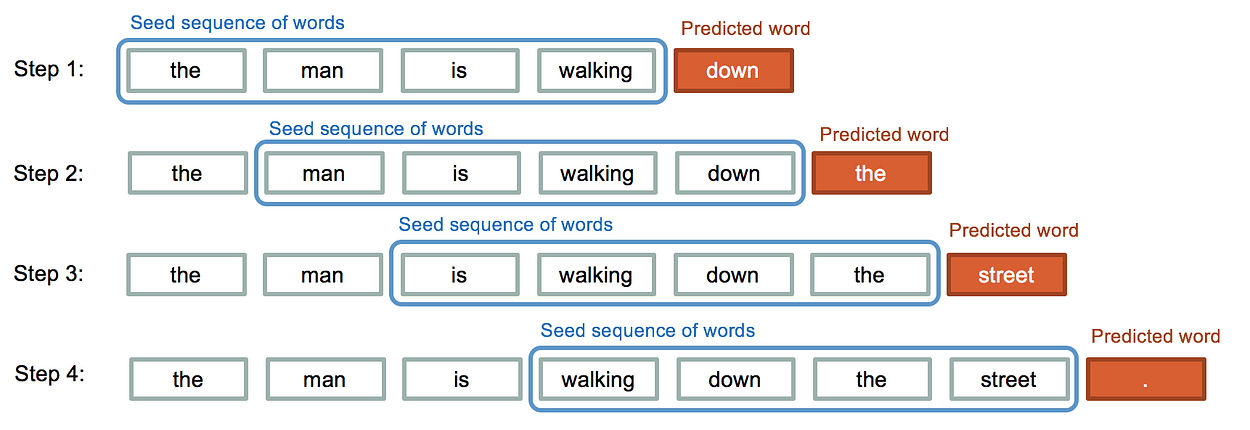

In [ ]:
# Convert text to sequences
input_sequences = []
for line in text.split('\n'):
    #use tokenizer.sequences_to_lists to convert your text into tokens and create a list called token_list
    token_list = tokenizer.texts_to_sequences([line])[0]#write code here

    #create n-grams with length 1,2,3....upto length of token_list and append to input_sequences (Include the word to be predicted)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

input_sequences

The input_sequences list you got has n-grams of variable length, which isin't very good for training, so we pad the sequences to make them equal in length.

In [ ]:
# Pad sequences for equal length
max_sequence_length = max(len(i) for i in input_sequences)#find max length among all sequences
#use pad_sequences to perform prepadding
input_sequences = pad_sequences(input_sequences, padding = 'pre', truncating = 'post')
input_sequences

In [ ]:
# Create predictors and labels
X, y = input_sequences[:,:-1],input_sequences[:,-1] #X is sequence of words except the last word, y is the word to be predicted
y = tf.keras.utils.to_categorical(y)#Use to_categorical function of Keras to convert target words

print(X.shape, y.shape)

In [ ]:
#Create a sequential model with an Embedding layer with vocabulary, dimensions, and input_length as parameters, an LSTM with 100 units, and a Dense layer with softmax activation
model = Sequential()
model.add(Embedding(vocabulary, 100)) #removed input_length as it was giving an
model.add(LSTM(100))
model.add(Dense(vocabulary, activation='softmax'))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=350,verbose=2) # increase the number of epochs for better accuracy, decrease for reducing time
#epochs = 100 -> nearly 33% accuracy
#epochs = 150 -> nearly 38%
#epochs = 200 -> nearly 42%
#epochs = 300 -> 50.38%
#epochs = 350 ->

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]#Convert seed_text into tokens
        token_list = np.array(pad_sequences([token_list], padding = 'pre', maxlen = max_sequence_length -1))#Perform prepadding on text
        # token_list = np.array(token_list).reshape(1, max_sequence_length -1)
        predicted_probs = model.predict(token_list, verbose=0)[0]

        predicted = np.argmax(predicted_probs)
        #return index of max probability value from the predictions

        output_word = ""
        #Search through the index list of your tokenizer (word_index) and if it matches the predicted index, save it as output_word and break
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break


        seed_text += " " + output_word
    return seed_text

# Generate text
generated_text = generate_text("Alice was", 20, model, max_sequence_length)
print(generated_text)

Hey, not bad! There is some coherence in outputted text which matches the style of the input text. Now its your turn to try and make the output make more sense by improving the model. Add more layers, increase the epochs, use a bigger dataset, play around with it! For example, you can load a document which has all the works of shakespeare and see how the output changes.

Do you now have some more respect for poor ChatGPT, which spits highly coherent and verbose sentences in the blink of an eye? Imagine how much training went into that.

Well, if you look at it closely, we're kinda cheating (but not really) by having words in our tokenizer since our model always defaults to a word in the vocab and shows some coherence. If you really wanna get wild, try out character generation and get coherent outputs from that -

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

Starting out, obviously you get a lot of random character wishwash, but many many iterations in, you can see the model truly attempt to capture the word style of the original document.

# Question Answering using RNN




First things first, what are RNN's ?

Ans: A recurrent neural network is a type of deep learning neural net that remembers the input sequence, stores it in memory states/cell states, and predicts the future words/sentences. However, they have a very short term retaining capacity.

https://www.youtube.com/watch?v=UNmqTiOnRfg

https://www.youtube.com/watch?v=OuYtk9Ymut4

For the adventurous people who need a challenge in life

https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

So everybody's heard about Sentiment Analysis. We are NOT going to do that here. Well, not in its rudimentary way. For a sentence which we know is positive, the question would essentially be, what part of the sentence is positive, and given the sentence as context, the answer gives you the part of the sentence which caused it to be positive. All possible through the power of RNN's. Let's start.

https://drive.google.com/file/d/1tR82E9MmUpTUdJzrng8z1iVgBlBiX08A/view?usp=drive_link

In [ ]:
# write code to load the dataset
rnn_df = pd.read_csv('/content/gdrive/My Drive/SynapseLP/ques_ans.csv')
rnn_df

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
context_tokenizer = Tokenizer()
tokenizer = Tokenizer()

#Fit your tokenizer on the text column
context_tokenizer.fit_on_texts(rnn_df.text.astype('str').tolist())
context = context_tokenizer.texts_to_sequences(rnn_df.text.astype('str').tolist())#Convert texts to sequences with the tokenizer for text column
tokenizer.fit_on_texts(rnn_df.selected_text.astype('str').tolist())
answers = tokenizer.texts_to_sequences(rnn_df.selected_text.astype('str').tolist())#Convert texts to sequences with the tokenizer for the selected_text column


#Finding the beginning and ending position of the answer in the context list
beg_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]
end_pos = [[1 if a[x:x+len(b)] == b else 0 for x in range(len(a))] for a, b in zip(context, answers)]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
context = np.array(pad_sequences(context, maxlen=36, padding='post', truncating='post'))
#Do the same for beg_pos and end_pos
beg_pos = np.array(pad_sequences(beg_pos, maxlen= 36, padding = 'post', truncating = 'post'))
end_pos = np.array(pad_sequences(end_pos, maxlen = 36, padding = 'post', truncating = 'post'))

# Using numpy, check for rows in 'beg_pos' where all elements are zero
non_zero = np.where(np.all(beg_pos == 0, axis = 1))

# Filter out rows in the arrays context, beg_pos, and end_pos where 'beg_pos' is all zero
context = context[np.where(np.all(beg_pos == 0, axis = 1))[0]]
beg_pos = beg_pos[np.where(np.all(beg_pos == 0, axis = 1))[0]]
end_pos = end_pos[np.where(np.all(beg_pos == 0, axis = 1))[0]]

# Add a new axis to 'beg_pos' and 'end_pos'
beg_pos = np.expand_dims(beg_pos, axis=2)
end_pos = np.expand_dims(end_pos, axis=2)

# Concatenate 'beg_pos' and 'end_pos' along the third axis, creating a 3D array
ans_vec = np.concatenate((beg_pos, end_pos), axis=2)

context.shape, beg_pos.shape, end_pos.shape, ans_vec.shape

In [ ]:
question_tokenizer = Tokenizer()
question_tokenizer.fit_on_texts(rnn_df.sentiment.fillna(''))
question = question_tokenizer.texts_to_sequences(rnn_df.sentiment.fillna(''))
# write code to pad sequences for question, like in the previous cell
question = pad_sequences(question, maxlen = 36, padding = 'post', truncating = 'post')
# Filter out rows in the question array where 'beg_pos' is all zero
question = question[np.where(np.all(beg_pos == 0, axis = 1))[0]]
question.shape

In [ ]:
# perform train test split on context, question and ans_vec and print its shape
from sklearn.model_selection import train_test_split
context_train, context_test, question_train, question_test, ans_vec_train, ans_vec_test = train_test_split(context, question, ans_vec, test_size = 0.2, random_state = 10)
context_train.shape, context_test.shape, question_train.shape, question_test.shape, ans_vec_train.shape, ans_vec_test.shape

https://keras.io/api/layers/merging_layers/concatenate/

GRU(Gated Recurrent Units) - https://youtu.be/tOuXgORsXJ4?si=BG9l-HXTijxaovHO

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers as L

EMBED_DIM = 64
N_REC = 64

# create input layers for context_inp and question_input. Name it context and question
context_inp = L.Input(shape = (36,), name = 'context')
question_inp = L.Input(shape = (36,), name = 'question')

context_emb = L.Embedding(len(context_tokenizer.word_index)+1, EMBED_DIM, name='context_embeddings')(context_inp)
question_emb = L.Embedding(len(question_tokenizer.word_index)+1, EMBED_DIM, name='question_embeddings')(question_inp)

# create GRU layers for context_emb and question_emb, keep return_sequences = True
c_gru = L.GRU(units = EMBED_DIM, return_sequences = True)(context_emb)
q_gru = L.GRU(N_REC, return_sequences = True)(question_emb)

#write code to concatenate these 2 embedding layers, and create a Dense layer for the output
outputs = L.Dense(units = 2, activation = 'sigmoid')(L.concatenate([c_gru, q_gru]))

model = keras.Model(inputs=[context_inp, question_inp], outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [ ]:
es = keras.callbacks.EarlyStopping(min_delta=1e-4, patience=5, verbose=1, restore_best_weights=True)
rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)

# fit the model with train data for [context, question] and ans_vec, and similarly write code for validation data, store it in a variable named 'history'
# do not forget to keep the number of epochs as 25 and the callbacks as es and rlp
history = model.fit([context_train, question_train], ans_vec_train, epochs = 25, callbacks = [es, rlp], validation_data = ([context_test, question_test], ans_vec_test))
validation_data = model.evaluate([context_test, question_test], ans_vec_test)

In [ ]:
# idx = 10
query_context = "He is playing cricket." #context_test[idx:idx+1]
query_question = "neutral"#question_test[idx:idx+1]
query_ans_vec = "playing" #ans_vec_test[idx:idx+1]
query_context = context_tokenizer.texts_to_sequences([query_context])[0]
query_question = context_tokenizer.texts_to_sequences([query_question])[0]
query_context_padded = np.array(pad_sequences(query_context, maxlen = 36, truncating = 'post', padding = 'post'))
query_question_padded = np.array(pad_sequences(query_question, maxlen = 36, truncating = 'post', padding = 'post'))
query_ans_beg, query_ans_end  = np.ravel(ans_vec_test[idx:idx+1].argmax(axis=1))  #Look into what this does
# np.ravel returns the 1D equivalent of an array.
# it will find the maximum argument from axis 1 of the ans_vec_test[idx] array, in a 2D array form (1 X 2 matrix), which needs to be converted into 1D array.
# maximum value in ans_vec_test[idx] along a particular axis will either indicate the beginning or end of the query, and thus only storing them, and further converting the, into

print('Context:', context_tokenizer.sequences_to_texts(query_context))
print('Question:', question_tokenizer.sequences_to_texts(query_question))
print('Answer:', context_tokenizer.sequences_to_texts([query_context[0][query_ans_beg: query_ans_end+1]]))
pred_ans_beg, pred_ans_end = np.ravel(model([query_context, query_question]).numpy().argmax(axis=1))
print('Predicted Answer:', context_tokenizer.sequences_to_texts([query_context[0][pred_ans_beg: pred_ans_end+1]]))

Just for fun, here is a cell to put custom inputs and predict which part of the sentence matches the question you input.

In [ ]:
def predict_custom_input(custom_context, custom_question):
    # Tokenize and preprocess the custom input
    custom_context_seq = context_tokenizer.texts_to_sequences([custom_context])
    custom_context_padded = np.array(pad_sequences(custom_context_seq, maxlen=36, padding='post', truncating='post'))

    custom_question_seq = question_tokenizer.texts_to_sequences([custom_question])
    custom_question_padded = np.array(pad_sequences(custom_question_seq, maxlen=36, padding='post', truncating='post'))

    # Make predictions using the trained model
    predictions = model.predict([custom_context_padded, custom_question_padded])

    # Extract predicted answer indices
    pred_ans_beg, pred_ans_end = np.ravel(predictions.argmax(axis=1))

    # Convert indices to text
    pred_answer_text = context_tokenizer.sequences_to_texts([custom_context_padded[0][pred_ans_beg: pred_ans_end+1]])

    # Print the results
    print('Custom Input:')
    print('Context:', custom_context)
    print('Question:', custom_question)
    print('Predicted Answer:', pred_answer_text)

# Example usage:
custom_context_input = input("Your custom context goes here.")
custom_question_input = input("Your custom question goes here.")
predict_custom_input(custom_context_input, custom_question_input)


# <font color='#4879E2'>More resources</font>

Yoav Goldberg's book [Neural Network Methods for Natural Language Processing](http://www.morganclaypool.com/doi/abs/10.2200/S00762ED1V01Y201703HLT037) is a thorough introduction to neural networks for NLP tasks in general.

If you'd like to learn more about what Keras is doing under the hood, there is a [Theano tutorial](http://deeplearning.net/tutorial/lstm.html) that also applies an RNN to sentiment prediction, using the same dataset here

Andrej Karpathy's blog post [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) is very helpful for understanding the mathematical details of an RNN, applied to the task of language modeling. It also provides raw Python code with an implementation of the backpropagation algorithm.

TensorFlow also has an RNN language model [tutorial](https://www.tensorflow.org/versions/r0.12/tutorials/recurrent/index.html) using the Penn Treebank dataset

Chris Olah provides a good [explanation](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) of how LSTM RNNs work (this explanation also applies to the GRU model used here)

Denny Britz's [tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) documents well both the technical details of RNNs and their implementation in Python.

#Research Task

Look into how Name Entity Recognition and Parts of Speech Tagging work and show your research for the same.


**NAME ENTITY RECOGNITION**

Named entity recognition (NER)—also called entity chunking or entity extraction—is a component of natural language processing (NLP) that identifies predefined categories of objects in a body of text.

NER METHODOLOGIES

Lexicon Based Method

The NER uses a dictionary with a list of words or terms. The process involves checking if any of these words are present in a given text. However, this approach isn’t commonly used because it requires constant updating and careful maintenance of the dictionary to stay accurate and effective.


Rule Based Method

The Rule Based NER method uses a set of predefined rules guides the extraction of information. These rules are based on patterns and context. Pattern-based rules focus on the structure and form of words, looking at their morphological patterns. On the other hand, context-based rules consider the surrounding words or the context in which a word appears within the text document. This combination of pattern-based and context-based rules enhances the precision of information extraction in Named Entity Recognition (NER).

Machine Learning-Based Method

* Multi-Class Classification with Machine Learning Algorithms
One way is to train the model for multi-class classification using different machine learning algorithms, but it requires a lot of labelling. In addition to labelling the model also requires a deep understanding of context to deal with the ambiguity of the sentences. This makes it a challenging task for a simple machine learning algorithm.
* Conditional Random Field (CRF)
Conditional random field is implemented by both NLP Speech Tagger and NLTK.  It is a probabilistic model that can be used to model sequential data such as words.
The CRF can capture a deep understanding of the context of the sentence. In this model, the input
* Deep Learning Based Method
Deep learning NER system is much more accurate than previous method, as it is capable to assemble words. This is due to the fact that it used a method called word embedding, that is capable of understanding the semantic and syntactic relationship between various words.
It is also able to learn analyzes topic specific as well as high level words automatically.

This makes deep learning NER applicable for performing multiple tasks. Deep learning can do most of the repetitive work itself, hence researchers for example can use their time more efficiently.

HOW NER WORKS

Step 1. Data collection
The first step of NER is to aggregate a dataset of annotated text. The dataset should contain examples of text where named entities are labeled or marked, indicating their types. The annotations can be done manually or using automated methods.

Step 2. Data preprocessing
Once the dataset is collected, the text should be cleaned and formatted. You may need to remove unnecessary characters, normalize the text and/or split text into sentences or tokens.

Step 3. Feature extraction
During this stage, relevant features are extracted from the preprocessed text. These features can include part-of-speech tagging (POS tagging), word embeddings and contextual information, among others. The choice of features will depend on the specific NER model the organization uses.

Step 4. Model training
The next step is to train a machine learning or deep learning model using the annotated dataset and the extracted features. The model learns to identify patterns and relationships between words in the text, as well as their corresponding named entity labels.

Step 5. Model evaluation
After you have trained the NER model, it should be evaluated to assess its performance. You can measure metrics like precision, recall and F1 score, which indicate how well the model correctly identifies and classifies named entities.

Step 6. Model fine-tuning
Based on the evaluation results, you will refine the model to improve its performance. This can include adjusting hyperparameters, modifying the training data and/or using more advanced techniques (e.g., ensembling or domain adaptation).

Step 7. Inference
At this stage, you can start using the model for inference on new, unseen text. The model will take the input text, apply the preprocessing steps, extract relevant features and ultimately predict the named entity labels for each token or span of text.

Step 8. Post-processing
The output of the NER model may need to undergo post-processing steps to refine results and/or add contextual information. You may need to complete tasks like entity linking, wherein the named entities are linked to knowledge bases or databases for further enrichment.

APPLICATIONS OF NER

* Information extraction
NER is a crucial first step in extracting useful, structured information from large, unstructured databases. Search engines use NER to improve the relevance and preciseness of their search results.

* Automated news aggregation
News aggregators use NER to categorize articles and stories based on the named entities they contain, enabling a more organized, efficient way of presenting news to audiences. For instance, NER for news apps automates the classification process, grouping similar news stories together and providing a more comprehensive view of particular news events.

* Social media monitoring
With the proliferation of social media platforms, the amount of textual data available for analysis is overwhelming. NER plays a significant role in social media analysis, identifying key entities in posts and comments to understand trends and public opinions about different topics (especially opinions around brands and products). This information can help companies conduct sentiment analyses, develop marketing strategies, craft customer service responses and accelerate product development efforts.

* Chatbots and virtual assistants
Virtual assistants and generative artificial intelligence chatbots and use NER to understand user requests and customer support queries accurately. By identifying critical entities in user queries, these AI-powered tools can provide precise, context-specific responses. For example, in the query "Find Soul Food restaurants near Piedmont Park," NER helps the assistant understand "Soul Food" as the cuisine, "restaurants" as the type of establishment and "Piedmont Park" as the location.

* Cybersecurity
In cybersecurity, NER helps companies identify potential threats and anomalies in network logs and other security-related data. For example, it can identify suspicious IP addresses, URLs, usernames and filenames in network security logs. As such, NER can facilitate more thorough security incident investigations and improve overall network security.


**PARTS OF SPEECH TAGGING**

Parts of Speech tagging is a linguistic activity in Natural Language Processing (NLP) wherein each word in a document is given a particular part of speech (adverb, adjective, verb, etc.) or grammatical category. Through the addition of a layer of syntactic and semantic information to the words, this procedure makes it easier to comprehend the sentence’s structure and meaning.

In NLP applications, POS tagging is useful for machine translation, named entity recognition, and information extraction, among other things. It also works well for clearing out ambiguity in terms with numerous meanings and revealing a sentence’s grammatical structure.

Default tagging is a basic step for the part-of-speech tagging. It is performed using the DefaultTagger class. The DefaultTagger class takes ‘tag’ as a single argument. NN is the tag for a singular noun. DefaultTagger is most useful when it gets to work with most common part-of-speech tag. that’s why a noun tag is recommended.

HOW POS WORKS

The following are the processes in a typical natural language processing (NLP) example of part-of-speech (POS) tagging:

* Tokenization: Divide the input text into discrete tokens, which are usually units of words or subwords. The first stage in NLP tasks is tokenization.
* Loading Language Models: To utilize a library such as NLTK or SpaCy, be sure to load the relevant language model. These models offer a foundation for comprehending a language’s grammatical structure since they have been trained on a vast amount of linguistic data.
* Text Processing: If required, preprocess the text to handle special characters, convert it to lowercase, or eliminate superfluous information. Correct PoS labeling is aided by clear text.
* Linguistic Analysis: To determine the text’s grammatical structure, use linguistic analysis. This entails understanding each word’s purpose inside the sentence, including whether it is an adjective, verb, noun, or other.
* Part-of-Speech Tagging: To determine the text’s grammatical structure, use linguistic analysis. This entails understanding each word’s purpose inside the sentence, including whether it is an adjective, verb, noun, or other.
* Results Analysis: Verify the accuracy and consistency of the PoS tagging findings with the source text. Determine and correct any possible problems or mistagging.

TYPES OF POS TAGGERS

POS-tagging algorithms fall into two distinctive groups:
* Rule-Based POS Taggers
* Stochastic POS Taggers
* Transformation Based Taggers

Rule-Based Tagging

Automatic part of speech tagging is an area of natural language processing where statistical techniques have been more successful than rule-based methods.
Typical rule-based approaches use contextual information to assign tags to unknown or ambiguous words. Disambiguation is done by analyzing the linguistic features of the word, its preceding word, its following word, and other aspects.
For example, if the preceding word is an article, then the word in question must be a noun. This information is coded in the form of rules.

Stochastic Part-of-Speech Tagging

The term ‘stochastic tagger’ can refer to any number of different approaches to the problem of POS tagging. Any model which somehow incorporates frequency or probability may be properly labelled stochastic.
The simplest stochastic taggers disambiguate words based solely on the probability that a word occurs with a particular tag. In other words, the tag encountered most frequently in the training set with the word is the one assigned to an ambiguous instance of that word. The problem with this approach is that while it may yield a valid tag for a given word, it can also yield inadmissible sequences of tags.
An alternative to the word frequency approach is to calculate the probability of a given sequence of tags occurring. This is sometimes referred to as the n-gram approach, referring to the fact that the best tag for a given word is determined by the probability that it occurs with the n previous tags. This approach makes much more sense than the one defined before, because it considers the tags for individual words based on context.
In order to capture the statistical linkages present in language, these algorithms learn the probability distribution of word-tag sequences. CRFs (conditional random fields) and Hidden Markov Models (HMMs) are popular models for statistical point-of-sale classification. The algorithm estimates the chance of observing a specific tag given the current word and its context by learning from labeled samples during training. Hidden Markov Model POS tagging: Hidden Markov Models (HMMs) serve as a statistical framework for part-of-speech (POS) tagging in natural language processing (NLP). In HMM-based POS tagging, the model undergoes training on a sizable annotated text corpus to discern patterns in various parts of speech. Leveraging this training, the model predicts the POS tag for a given word based on the probabilities associated with different tags within its context.
Comprising states for potential POS tags and transitions between them, the HMM-based POS tagger learns transition probabilities and word-emission probabilities during training. To tag new text, the model, employing the Viterbi algorithm, calculates the most probable sequence of POS tags based on the learned probabilities.

Transformation Based tagging

Transformation-based tagging (TBT) is a part-of-speech (POS) tagging method that uses a set of rules to change the tags that are applied to words inside a text. In contrast, statistical POS tagging uses trained algorithms to predict tags probabilistically, while rule-based POS tagging assigns tags directly based on predefined rules.
To change word tags in TBT, a set of rules is created depending on contextual information. A rule could, for example, change a verb’s tag to a noun if it comes after a determiner like “the.” The text is systematically subjected to these criteria, and after each transformation, the tags are updated.
When compared to rule-based tagging, TBT can provide higher accuracy, especially when dealing with complex grammatical structures. To attain ideal performance, nevertheless, it might require a large rule set and additional computer power.